In [174]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()

  Updating registry at `/opt/julia/share/site/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %

In [175]:
using Revise
using Plots
using Distributions
using StatisticalProcesses

In [176]:
using LinearAlgebra: norm

k(x, xp; σ, δ) = δ^2 * exp(-norm(x-xp)^2/(2σ^2))

k (generic function with 1 method)

StatisticalProcesses.loglikelihood(gp) = 57.817863461853385
variable_hypers = Symbol[:σn, :σ, :δ]
initial = [0.1, 1.0, 0.5]
lower = [0.001, 0.001, 0.001]
upper = [Inf, Inf, Inf]
Initial: Dict(:σn=>0.1,:σ=>1.0,:δ=>0.5)
res = Results of Optimization Algorithm
 * Algorithm: Fminbox with L-BFGS
 * Starting Point: [0.1,1.0,0.5]
 * Minimizer: [0.02570578904151444,0.15894335102451565, ...]
 * Minimum: -1.008579e+02
 * Iterations: 4
 * Convergence: true
   * |x - x'| ≤ 0.0e+00: true 
     |x - x'| = 0.00e+00 
   * |f(x) - f(x')| ≤ 0.0e+00 |f(x)|: true
     |f(x) - f(x')| = 0.00e+00 |f(x)|
   * |g(x)| ≤ 1.0e-08: false 
     |g(x)| = 1.31e-06 
   * Stopped by an increasing objective: false
   * Reached Maximum Number of Iterations: false
 * Objective Calls: 326
 * Gradient Calls: 326
Optimised: Dict(:σn=>0.0257058,:σ=>0.158943,:δ=>0.195528)
loglikelihood(opt_gp) = 100.85785991968731
Marginal likelihood (Laplace approximation): 0.011486163288453848

L1 = StatisticalProcesses.loglikelihood(stp) = 

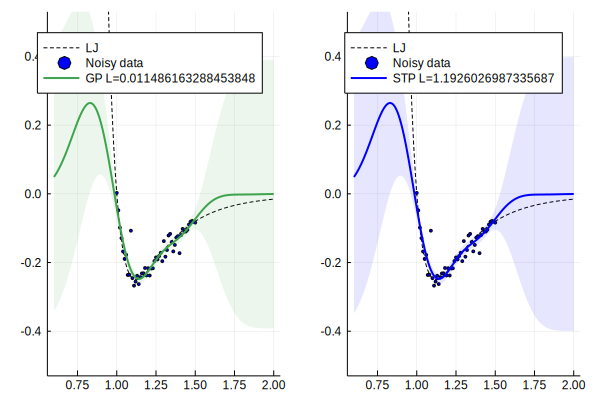

In [219]:
# LJ potential
x = collect(1.0:0.01:1.5)
y = 1 ./ x.^12  - 1 ./ x.^6 

# Add Student-T distributed noise
t = TDist(2.)
y += + 0.01*rand(t, length(x))

xx = collect(0.6:0.01:2)
yy = 1 ./ xx.^12  - 1 ./ xx.^6

p1 = plot(xx, yy, color=:black, linestyle=:dash, label="LJ", ylims=[-0.5,0.5])
scatter!(x, y, color=:blue, marker=:o, markersize=1, label="Noisy data")

gp = GP(x, y, k; σn=0.1, σ=1.0, δ=0.5)
@show StatisticalProcesses.loglikelihood(gp)

hypers, L_gp, opt_gp = optimize_hypers(gp)
#@show hypers, L_gp

μ, v = opt_gp(xx)
σ = sqrt.(v)

plot!(xx, μ, ribbon=(2σ, 2σ), lw=2, fillalpha=0.1, 
      label="GP L=$(L_gp[3])")
println()

stp = STP(x, y, k; ν=2.1, σn=0.1, δ=0.5, σ=3.0)
@show L1 = StatisticalProcesses.loglikelihood(stp)

hypers, L_stp, opt_stp = optimize_hypers(stp, fix=[:ν])
#@show hypers, L_stp

#stp_posterior = posterior(stp, xx)

p2 = plot(xx, yy, color=:black, linestyle=:dash, label="LJ")
scatter!(x, y, color=:blue, marker=:o, markersize=1, label="Noisy data")

μ, v = opt_stp(xx)
σ = sqrt.(v)

plot!(xx, μ, lw=2, color=:blue,
      ribbon=(2σ, 2σ), 
      fillalpha=0.1, fillcolor=:blue,
      label="STP L=$(L_stp[3])", ylims=[-0.5,0.5])

plot(p1, p2)

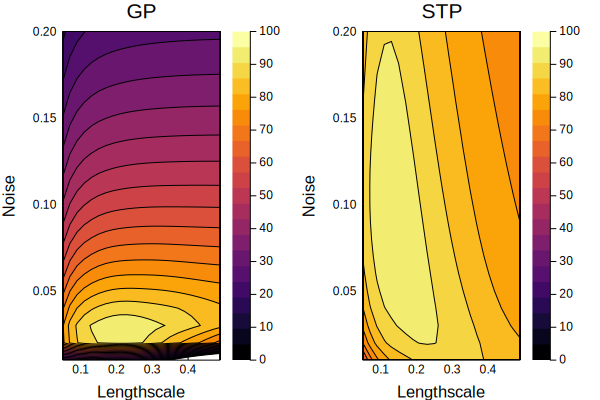

In [232]:
As = 0.05:0.02:0.5
Bs = 0.01:0.01:0.2
L = 0:5:100

gcf(A,B) = loglikelihood(GP(x, y, k, σ=A, σn=B, δ=.5))
scf(A,B) = loglikelihood(STP(x, y, k, ν=2.1, σ=A, σn=B, δ=.5))

plot(contourf(As, Bs, gcf, levels=L, clims=(first(L),last(L))), 
     contourf(As, Bs, scf, levels=L, clims=(first(L),last(L))),
     xlabel="Lengthscale", ylabel="Noise", title=["GP" "STP"])